# Group 3 - Assigment 3

In [1]:
import pandas as pd
import numpy as np
import nxviz as nv
import networkx as nx
import seaborn as sns
from pandasql import sqldf
from wordcloud import WordCloud, STOPWORDS  # used to generate world cloud
import matplotlib.pyplot as plt
import time

## 1. Insights with the Positive Sentiment

### Loading the data

In [2]:
%%time
startTime = time.time()
data = pd.read_csv("data/soc-redditHyperlinks-body.tsv", sep='\t')
# data = pd.read_csv("data/soc-redditHyperlinks-title.tsv", sep='\t')
data.head()

Wall time: 3.21 s


,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08..."
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049..."
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082..."
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0...."
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0...."


In [3]:
data.shape

(286561, 6)

In [4]:
data.columns

Index(['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT', 'POST_ID', 'TIMESTAMP',
       'LINK_SENTIMENT', 'PROPERTIES'],
      dtype='object')

In [5]:
data.dtypes

SOURCE_SUBREDDIT    object
TARGET_SUBREDDIT    object
POST_ID             object
TIMESTAMP           object
LINK_SENTIMENT       int64
PROPERTIES          object
dtype: object

In [6]:
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'], format="%Y-%m-%d %H:%M:%S")
data.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08..."
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049..."
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082..."
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0...."
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0...."


### Data Cleaning

In [7]:
data.isnull().any()

SOURCE_SUBREDDIT    False
TARGET_SUBREDDIT    False
POST_ID             False
TIMESTAMP           False
LINK_SENTIMENT      False
PROPERTIES          False
dtype: bool

- there is no null value in the dataset

### Top 50 source subreddit

In [8]:
top50Source = data.groupby('SOURCE_SUBREDDIT')['POST_ID'].count().reset_index(name='count').sort_values(by='count',ascending=False).head(50)
top50Source.head()

,SOURCE_SUBREDDIT,count
23227,subredditdrama,4665
4449,circlebroke,2358
21675,shitliberalssay,1968
17404,outoftheloop,1958
5225,copypasta,1824


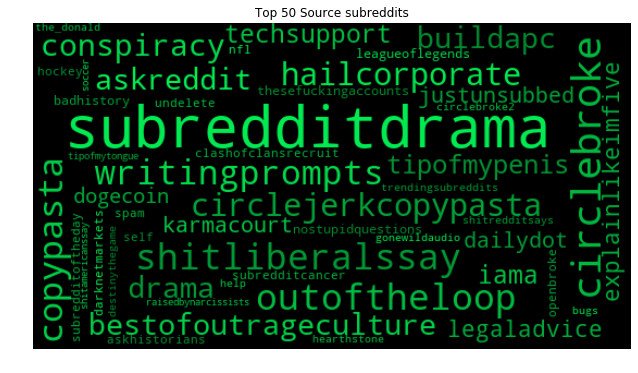

In [9]:
# Function that control the color of the words
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    tone = 100 # define the color of the words
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


topSource = top50Source.set_index('SOURCE_SUBREDDIT')['count'].to_dict()
f, ax = plt.subplots(figsize=(15, 6))
wordcloud = WordCloud(width=550, height=300, background_color='black', 
                      max_words=50, relative_scaling=0.6,
                      color_func = random_color_func,
                      normalize_plurals=True)
wordcloud.generate_from_frequencies(topSource)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Top 50 Source subreddits")
plt.axis('off')
plt.show()

### Top 50 target subreddit

In [10]:
top50Target = data.groupby('TARGET_SUBREDDIT')['POST_ID'].count().reset_index(name='count').sort_values(by='count',ascending=False).head(50)
top50Target.head()

,TARGET_SUBREDDIT,count
1287,askreddit,7329
8618,iama,3694
13557,pics,2779
20287,writingprompts,2490
19539,videos,2446


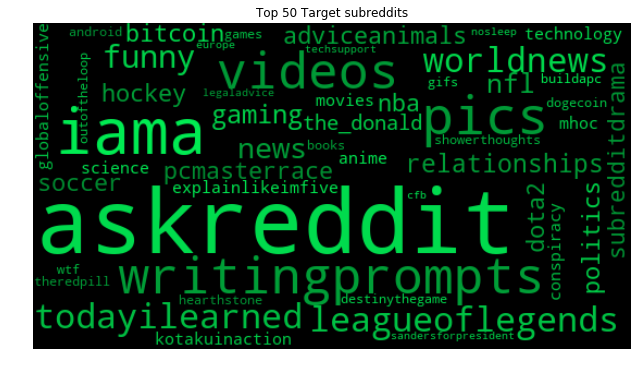

In [11]:
topTarget = top50Target.set_index('TARGET_SUBREDDIT')['count'].to_dict()
f, ax = plt.subplots(figsize=(15, 6))
wordcloud = WordCloud(width=550, height=300, background_color='Black', 
                      max_words=50, relative_scaling=0.6,
                      color_func = random_color_func,
                      normalize_plurals=True)
wordcloud.generate_from_frequencies(topTarget)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Top 50 Target subreddits")
plt.axis('off')
plt.show()

#### How many unique source and target subreddit?

In [12]:
uniqueSource = data['SOURCE_SUBREDDIT'].unique()
uniqueSource.size

27863

In [13]:
uniqueTarget = data['TARGET_SUBREDDIT'].unique()
uniqueTarget.size

20606

#### How many different POST_ID exists?

In [14]:
data.shape

(286561, 6)

In [15]:
uniquePost = data['POST_ID'].unique()
uniquePost.size

259092

In [16]:
post = data.groupby('POST_ID')['LINK_SENTIMENT'].count().reset_index(name='count').sort_values(by='count', ascending=False)
print(post.shape)
post.head()

(259092, 2)


,POST_ID,count
158363,4asjoos,167
151462,46f9jws,88
158383,4at6als,85
121057,3o3ujts,62
138911,3yj2ee,53


In [17]:
postId = data[data.POST_ID=="4asjoos"]
postId.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
173191,testingground4bots,cooking,4asjoos,2016-03-16 08:16:22,1,"39838.0,38917.0,0.656057030975,0.064335559014,..."
173192,testingground4bots,mortalkombat,4asjoos,2016-03-16 08:16:22,1,"39838.0,38917.0,0.656057030975,0.064335559014,..."
173193,testingground4bots,savannah,4asjoos,2016-03-16 08:16:22,1,"39838.0,38917.0,0.656057030975,0.064335559014,..."
173194,testingground4bots,electronic_cigarette,4asjoos,2016-03-16 08:16:22,1,"39838.0,38917.0,0.656057030975,0.064335559014,..."
173195,testingground4bots,washingtondc,4asjoos,2016-03-16 08:16:22,1,"39838.0,38917.0,0.656057030975,0.064335559014,..."


- As we can see there are multiple target for the same post

### What is the percentage of negative link sentiment?

Source to positve target:  (265491, 6)
Source to negative target:  (21070, 6)
Negative % =  7.352710243194294


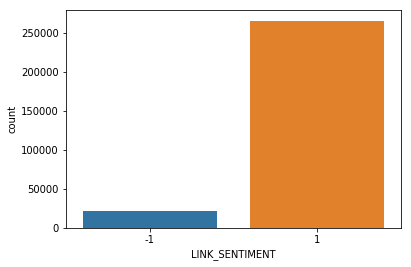

In [18]:
posLinkSentiments = data[data.LINK_SENTIMENT == 1]
negLinkSentiments = data[data.LINK_SENTIMENT == -1]
print("Source to positve target: ", posLinkSentiments.shape)
print("Source to negative target: ", negLinkSentiments.shape)
print("Negative % = ", negLinkSentiments.shape[0]*100/(posLinkSentiments.shape[0] + negLinkSentiments.shape[0]))
sns.countplot(x='LINK_SENTIMENT', data=data)

### Show the top target for postive and negative sentiments

In [19]:
topPosTarget = posLinkSentiments.groupby('TARGET_SUBREDDIT')['POST_ID'].count().reset_index(name='count').sort_values(by='count', ascending=False)
topPosTarget.head()

,TARGET_SUBREDDIT,count
1254,askreddit,6437
8414,iama,3513
13242,pics,2415
19808,writingprompts,2387
9707,leagueoflegends,2286


In [20]:
topNegTarget = negLinkSentiments.groupby('TARGET_SUBREDDIT')['POST_ID'].count().reset_index(name='count').sort_values(by='count', ascending=False)
topNegTarget.head()

,TARGET_SUBREDDIT,count
264,askreddit,892
3842,worldnews,390
2352,news,390
3716,videos,373
2583,pics,364


### How many unique source and target subreddit exists where link sentiments is positive?

In [21]:
uniqueSourceTarget = posLinkSentiments.groupby(['SOURCE_SUBREDDIT','TARGET_SUBREDDIT'])['POST_ID'].count().reset_index(name='count').sort_values(by='count', ascending=False)
print(uniqueSourceTarget.shape)
uniqueSourceTarget.head()

(130513, 3)


,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,count
121185,trendingsubreddits,changelog,548
76038,mushroomkingdom,gamesale,243
18799,buildapc,buildapcforme,243
108946,streetfighter,sf4,240
16252,bluejackets,bluejacketsgwg,223


- as we can see, out of 265k rows(positive sentiment), only 130k rows has unique source and target subreddit

### Convert the data into graph model 
- vertex: subreddits
- edge: source and target subreddits, if they have positve link_sentiment
- Adjacency list

In [22]:
# first give each subreddits an index value
subreddits = np.concatenate((uniqueSource, uniqueTarget), axis=0)
subreddits = np.unique(subreddits)
# subreddits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
subreddits_dict = {val : idx for idx, val in enumerate(subreddits)}
rsubreddits_dict = {val : key for key, val in subreddits_dict.items()}

In [23]:
# implementation of an undirected graph using Adjacency Lists
class Vertex:
    def __init__(self, name):
        self.name = name
        self.neighbors = list()
    
    def add_neighbor(self, v):
        if v not in self.neighbors:
            self.neighbors.append(v)

class Graph:
    def __init__(self):
        self.vertices = {}
    
    def add_vertex(self, vertex):
        if isinstance(vertex, Vertex) and vertex.name not in self.vertices:
            self.vertices[vertex.name] = vertex
            return True
        else:
            return False
    
    def add_edge(self, u, v):
        if u in self.vertices and v not in self.vertices[u].neighbors: # removing duplicate edges
            self.vertices[u].add_neighbor(v)
            return True
        else:
            return False
    
    def sort_neighbors(self):
        for x in self.vertices:
            self.vertices[x].neighbors.sort()
            
    def print_graph(self):
        for key in self.vertices.keys():
            print(str(key) + str(self.vertices[key].neighbors))

In [24]:
g = Graph() # for storing the original graph: source=>target
gt = Graph() # for storing the reverse graph: target=>source
gsm = Graph() # for storing all the edges(undirected): source=>target, target=>source
n = len(subreddits_dict.keys()) # number of nodes

# first add all the vertex in the vertices dictionary
for key, value in subreddits_dict.items():
    g.add_vertex(Vertex(value))
    gt.add_vertex(Vertex(value))
    gsm.add_vertex(Vertex(value))

# now add the edges to the graph
graph_data = posLinkSentiments[['SOURCE_SUBREDDIT','TARGET_SUBREDDIT']].values.tolist()
# graph_data = [[0,1],[1,2],[2,3],[2,0],[2,5],[5,6],[5,7],[6,8],[6,4],[8,9],[9,6],[10,11]]
# graph_data = [[0,1],[1,2],[2,3],[3,4],[4,0],[0,2],[1,3],[1,4]]

m = 0 # number of edges
for row in graph_data:
    x = subreddits_dict[row[0]]
    y = subreddits_dict[row[1]]
    m += g.add_edge(x, y)
    gt.add_edge(y, x)
    if x < y:
        gsm.add_edge(x, y)
    else:
        gsm.add_edge(y, x)

# sort the neighbors of each vertex
g.sort_neighbors()
# g.print_graph()

print("number of nodes:", n)
print("number of edges:", m)

number of nodes: 35776
number of edges: 130513


In [25]:
gt.sort_neighbors()
# gt.print_graph()

### Find clustering coefficient(global/local)
- Sort-Merge algorithm to find triangles and triads

In [26]:
gsm.sort_neighbors()
# gsm.print_graph()

In [27]:
%%time
triangles = []
triads = []
def find_triangles():
    visited_ids = set() # remember the nodes that we have tested already
    for node_a_id in g.vertices.keys():
        for node_b_id in g.vertices[node_a_id].neighbors:
            if node_b_id in visited_ids:
                continue # we should have already found b->a->??->b
            for node_c_id in g.vertices[node_b_id].neighbors:
                if node_c_id in visited_ids:
                    continue # we should have already found c->a->b->c
                if node_a_id in g.vertices[node_c_id].neighbors:
                    triangles.append([node_a_id, node_b_id, node_c_id])
        visited_ids.add(node_a_id) # don't search a - we already have all those cycles
        
def sort_merge():
    for u in gsm.vertices.keys():
        ulen = len(gsm.vertices[u].neighbors)
        for i in range(ulen):
            v = gsm.vertices[u].neighbors[i]
            if u > v:
                continue
            vlen = len(gsm.vertices[v].neighbors)
            up = i + 1
            down = 0
            while up < ulen or down < vlen:
                if down < vlen and gsm.vertices[v].neighbors[down] <= v:
                    down += 1
                    continue
                if up == ulen:
                    triads.append([u, v, gsm.vertices[v].neighbors[down]])
                    down += 1
                elif down == vlen:
                    triads.append([u, v, gsm.vertices[u].neighbors[up]])
                    up += 1
                elif gsm.vertices[u].neighbors[up] == gsm.vertices[v].neighbors[down]:
                    triangles.append([u, v, gsm.vertices[u].neighbors[up]])
                    up += 1
                    down += 1
                elif gsm.vertices[u].neighbors[up] > gsm.vertices[v].neighbors[down]:
                    triads.append([u, v, gsm.vertices[v].neighbors[down]])
                    down += 1
                else:
                    triads.append([u, v, gsm.vertices[u].neighbors[up]])
                    up += 1
                    
        
# find_triangles() # O(n^3)
# sort_merge()
print("number of triangles:", len(triangles))
print("number of triads:", len(triads)) # there are some left-overs, same as lecture slide
# print(triangles)
# print(triads)

number of triangles: 0
number of triads: 0
Wall time: 982 µs


### Find strongly connected components (similar subreddit)
- When there is a loop among all the nodes in a component
- Show the subreddits of same cluster

In [28]:
top_list = [] # topologically sorted nodes
scc = [] # strongly connected component
cc = [] # connected component
visited = [False] * n
scc_idx = 0
cc_idx = 0

In [29]:
import sys
sys.setrecursionlimit(10000)
def dfs(x): # normal dfs
    cc[cc_idx].append(x)
    visited[x] = True
    for y in g.vertices[x].neighbors:
        if not visited[y]:
            dfs(y)
    top_list.append(x) # topological sort
    
def rdfs(x): # reverse dfs to find the strongly connected components
    scc[scc_idx].append(x)
    visited[x] = False
    for y in gt.vertices[x].neighbors:
        if visited[y]:
            rdfs(y)

In [30]:
for x in range(0, n, 1):
    if not visited[x]:
        cc.append([])
        dfs(x)
        cc_idx += 1

for i in range(n-1, -1, -1):
    x = top_list[i]
    if visited[x]:
        scc.append([])
        rdfs(x)
        scc_idx += 1

cc = sorted(cc, key = lambda element : len(element), reverse = True)
print("total connected component:", cc_idx)
# print(cc)
scc = sorted(scc, key = lambda element : len(element), reverse = True)
print("total strongly connected component:", scc_idx)
# print(scc)

total connected component: 16518
total strongly connected component: 24407


#### Show the subreddits of second component

In [31]:
scc_idx = len(scc)
nodeToScc = {} # renaming the nodes, based on their scc index
for i in range(scc_idx):
    for x in scc[i]:
        nodeToScc[x] = i
for x in scc[1]:
    print(rsubreddits_dict[x])

contestofchampions
anoncanscoctreasury
contestofchampionslfg
contestofchampsarena
redealliance
xrdt4


[['contestofchampions', 'anoncanscoctreasury'], ['contestofchampions', 'contestofchampionslfg'], ['contestofchampions', 'contestofchampsarena'], ['anoncanscoctreasury', 'contestofchampions'], ['contestofchampionslfg', 'contestofchampions'], ['contestofchampionslfg', 'redealliance'], ['contestofchampionslfg', 'xrdt4'], ['contestofchampsarena', 'contestofchampions'], ['redealliance', 'contestofchampions'], ['xrdt4', 'contestofchampions']]


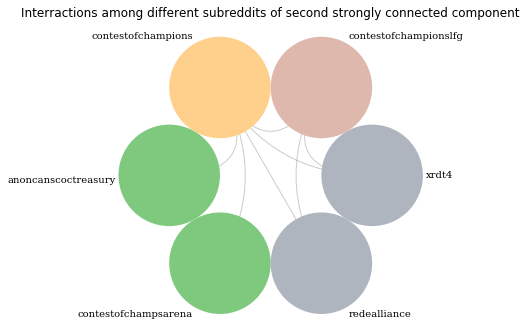

In [32]:
cur_scc = 1
edge_list = []
for x in scc[cur_scc]:
    for y in g.vertices[x].neighbors:
        if y in nodeToScc and nodeToScc[y]==cur_scc:
            edge_list.append([rsubreddits_dict[x], rsubreddits_dict[y]])
print(edge_list)
G = nx.Graph(edge_list)
for n in G.nodes():
    G.nodes[n]['degree'] = len(list(G.neighbors(n)))
c = nv.CircosPlot(G, node_labels=True, node_order='degree', node_color='degree')
# Draw the CircosPlot to the screen
c.draw()
plt.title("Interractions among different subreddits of second strongly connected component")
plt.show()

- the subreddits of 2nd cluster

#### print the size of each strongly connected component

In [33]:
for i in range(scc_idx):
    print("scc", i, ": size = ", len(scc[i]))
    if len(scc[i])==1:
        break

scc 0 : size =  11224
scc 1 : size =  6
scc 2 : size =  4
scc 3 : size =  4
scc 4 : size =  4
scc 5 : size =  4
scc 6 : size =  3
scc 7 : size =  3
scc 8 : size =  3
scc 9 : size =  3
scc 10 : size =  3
scc 11 : size =  3
scc 12 : size =  3
scc 13 : size =  3
scc 14 : size =  2
scc 15 : size =  2
scc 16 : size =  2
scc 17 : size =  2
scc 18 : size =  2
scc 19 : size =  2
scc 20 : size =  2
scc 21 : size =  2
scc 22 : size =  2
scc 23 : size =  2
scc 24 : size =  2
scc 25 : size =  2
scc 26 : size =  2
scc 27 : size =  2
scc 28 : size =  2
scc 29 : size =  2
scc 30 : size =  2
scc 31 : size =  2
scc 32 : size =  2
scc 33 : size =  2
scc 34 : size =  2
scc 35 : size =  2
scc 36 : size =  2
scc 37 : size =  2
scc 38 : size =  2
scc 39 : size =  2
scc 40 : size =  2
scc 41 : size =  2
scc 42 : size =  2
scc 43 : size =  2
scc 44 : size =  2
scc 45 : size =  2
scc 46 : size =  2
scc 47 : size =  2
scc 48 : size =  2
scc 49 : size =  2
scc 50 : size =  2
scc 51 : size =  2
scc 52 : size =  2

- as we can see, we have a big cluster of 11k nodes and all the other cluster has less than 10 nodes
- we have only 126 clusters where the size of the cluster greater than 1
- we will only work with these cluster/communities

### Make the aggregated graph (clustered, based on the paper: Visual Analysis of Large Graphs)

In [34]:
significantNodeInScc = {} # to store the most significant node in every cluster/scc
for i in range(scc_idx):
    maxi = -10**9 # negative infinite value
    for x in scc[i]:
        if len(g.vertices[x].neighbors) > maxi:
            maxi = len(g.vertices[x].neighbors)
            significantNodeInScc[i] = rsubreddits_dict[x]
# print(significantNodeInScc)

In [35]:
gScc = Graph()
# now add all the vertex(scc) in the vertices dictionary
for x in range(scc_idx):
    gScc.add_vertex(Vertex(x))
    
scc_edge = 0 # number of edges
# now add the edges to the graph
for i in range(scc_idx):
    for x in scc[i]:
        for y in g.vertices[x].neighbors:
            if y in nodeToScc and nodeToScc[y] != i: # different scc
                scc_edge += gScc.add_edge(i, nodeToScc[y])

# nodes in the aggregated graphs
print("nodes in the aggregated graph:", scc_idx)
print("edges in the aggregated graph:", scc_edge)

# sort the neighbors of each vertex
gScc.sort_neighbors()
# gScc.print_graph()

nodes in the aggregated graph: 24407
edges in the aggregated graph: 24900


- we have converted the 35k node and 286k edge graph into a 24k edge graph by using aggregation/clustering. Also, if we remove the scc component having less than 2 subreddits, the graph will convert to a 127 nodes and 99 edges graph.

#### show the relationship among the cluster, where each component has >=4 degree

In [36]:
min_degree = 4
edge_list = []
for x in gScc.vertices:
    if len(gScc.vertices[x].neighbors) < min_degree:
        continue
    for y in gScc.vertices[x].neighbors:
        if len(gScc.vertices[y].neighbors) < min_degree:
            continue
        edge_list.append([significantNodeInScc[x], significantNodeInScc[y]])
print("total edge of scc graph of degree >= 4:", len(edge_list))

total edge of scc graph of degree >= 4: 99


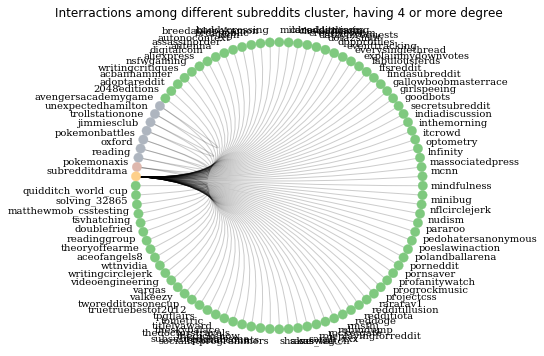

In [37]:
G = nx.Graph(edge_list)
for n in G.nodes():
    G.nodes[n]['degree'] = len(list(G.neighbors(n)))
c = nv.CircosPlot(G, node_labels=True, node_order='degree', node_color='degree')
# Draw the CircosPlot to the screen
c.draw()
plt.title("Interractions among different subreddits cluster, having 4 or more degree")
plt.show()

In [38]:
# remove all the scc where the community has less then 2 subreddits
idx = 0
while idx < scc_idx:
    if len(scc[idx]) == 1:
        break
    idx += 1
scc = scc[:idx]
scc_idx = idx

In [39]:
gScc = nx.Graph()
# now add all the vertex(scc) in the vertices dictionary
for x in range(scc_idx):
    gScc.add_node(significantNodeInScc[x])
    
# now add the edges to the graph
for i in range(scc_idx):
    for x in scc[i]:
        for y in g.vertices[x].neighbors:
            if y in nodeToScc and nodeToScc[y] != i and nodeToScc[y] < scc_idx: # different scc
                gScc.add_edge(significantNodeInScc[i], significantNodeInScc[nodeToScc[y]])
# nodes in the aggregated graphs
print("nodes in the aggregated graph:", scc_idx)
print("edges in the aggregated graph:", len(gScc.edges()))

nodes in the aggregated graph: 127
edges in the aggregated graph: 99


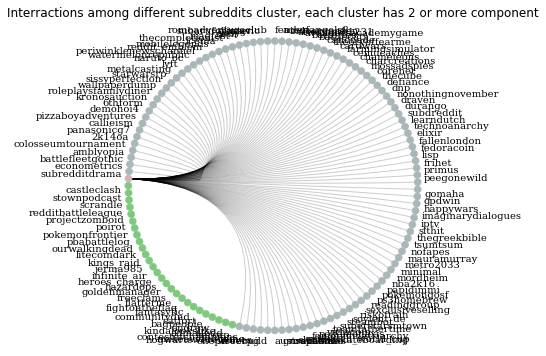

In [40]:
for n in gScc.nodes():
    gScc.nodes[n]['degree'] = len(list(gScc.neighbors(n)))
c = nv.CircosPlot(gScc, node_labels=True, node_order='degree', node_color='degree')
# Draw the CircosPlot to the screen
c.draw()
plt.title("Interractions among different subreddits cluster, each cluster has 2 or more component")
plt.show()

### Finding K-Core
- How sparse the graph is?

### Analysis of subreddit based on time
- When did this subreddit(i.e. askreddit) become popular?

### Is there any relationship between source and target subreddit when the LINK_SENTIMENT is negative?

In [41]:
print("It took %s seconds to process" % (time.time() - startTime))

It took 9.297145128250122 seconds to process


## 2. Insights with the Negative Sentiments

In [42]:
data = pd.read_csv("data/soc-redditHyperlinks-title.tsv", sep='\t')
data.shape

(571927, 6)

In [43]:
startTime = time.time()
def get_degree(G):
    degrees = [len(list(G.neighbors(n))) for n in G.nodes()]
    return degrees

def mark_nodes(size):
    nodes = []
    for n in N.nodes():
        if (len(list(N.neighbors(n)))<=size):
            nodes.append(n)
    return nodes

def mark_nodes_by_repetition(G,size):
    nodes = [n for n,d in G.nodes(data=True) if d['LINK_SENTIMENT']>=size]
    return nodes

def copy_sentiment_to_node(G):
    for x,y,d in G.edges(data=True):
        G.nodes[x]['LINK_SENTIMENT'] = d['LINK_SENTIMENT']
    for x,d in G.nodes(data=True):
        if len(d)<1:
            G.nodes[x]['LINK_SENTIMENT'] = 0

### Extract negative entries

In [44]:
data_neg = data[data.LINK_SENTIMENT<0]
print(data_neg.shape)
data_neg.head()

(61140, 6)


,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
16,subredditdrama,nfl,1u58yq,2013-12-31 21:59:32,-1,"165.0,135.0,0.781818181818,0.0,0.0666666666667..."
20,libertyworldproblems,bitcoin,1u5c58,2014-01-01 13:56:53,-1,"307.0,253.0,0.785016286645,0.00325732899023,0...."
52,shitstatistssay,foodforthought,1u5u7e,2014-01-01 07:01:10,-1,"275.0,231.0,0.807272727273,0.0,0.0290909090909..."
69,childfree,adviceanimals,1u635q,2014-01-01 11:06:32,-1,"149.0,128.0,0.812080536913,0.0,0.134228187919,..."
80,levantinewar,worldpolitics,1u66wi,2014-01-01 10:48:53,-1,"209.0,177.0,0.827751196172,0.0,0.0622009569378..."


In [45]:
data.dtypes

SOURCE_SUBREDDIT    object
TARGET_SUBREDDIT    object
POST_ID             object
TIMESTAMP           object
LINK_SENTIMENT       int64
PROPERTIES          object
dtype: object

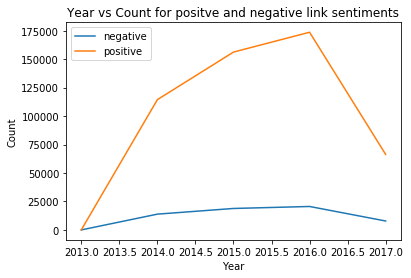

In [46]:
##to be changed to faster code
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'], format="%Y-%m-%d %H:%M:%S")
data['Year'] = data.TIMESTAMP.dt.year
tempnegsum = data[data.LINK_SENTIMENT<0].groupby('Year')['LINK_SENTIMENT'].count().reset_index(name="negative")
temppossum = data[data.LINK_SENTIMENT>0].groupby('Year')['LINK_SENTIMENT'].count().reset_index(name="positive")
plt.plot(tempnegsum.Year,tempnegsum.negative, label = "negative")
plt.plot(temppossum.Year,temppossum.positive, label = "positive")
plt.title("Year vs Count for positve and negative link sentiments")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()

### Collapsing multiple source, target entries into single entries

In [47]:
 a = set(data_neg['SOURCE_SUBREDDIT'])
 b = set(data_neg['TARGET_SUBREDDIT'])
 len(a.union(b))

9136

In [48]:
Total = data_neg['LINK_SENTIMENT'].sum()
Total

-61140

In [49]:
Total_neg = data_neg[(data_neg.SOURCE_SUBREDDIT=='subredditdrama')|(data_neg.TARGET_SUBREDDIT=='subredditdrama')]['LINK_SENTIMENT'].sum()
Total_neg/Total

0.13375858684985278

In [50]:
data_ext = data_neg[['SOURCE_SUBREDDIT','TARGET_SUBREDDIT','LINK_SENTIMENT']].groupby(['SOURCE_SUBREDDIT','TARGET_SUBREDDIT'])['LINK_SENTIMENT'].sum().reset_index()
print(data_ext.shape)
data_ext.head()

(29257, 3)


,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,LINK_SENTIMENT
0,1200isjerky,1200isplenty,-1
1,1200isjerky,dataisbeautiful,-1
2,1509,gaming,-1
3,16eralert,kappa,-2
4,18bfriendzonest,askreddit,-1


### Percentage of subreddits with negative sentiments to entire community

In [51]:
all_source = data['SOURCE_SUBREDDIT'].unique()
neg_source = data_ext['SOURCE_SUBREDDIT'].unique()

perc = (neg_source.size/all_source.size)*100
print("All negatives come from only "+str(perc)+"% of all subreddits")

All negatives come from only 14.228172559789451% of all subreddits


### Loading data into the graph structure

In [52]:
N=nx.Graph()
N=nx.from_pandas_edgelist(data_ext, 'SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT','LINK_SENTIMENT')

In [53]:
len(N.nodes())

9136

In [54]:
len(N.edges())

28610

### Plotting degree distribution of graph

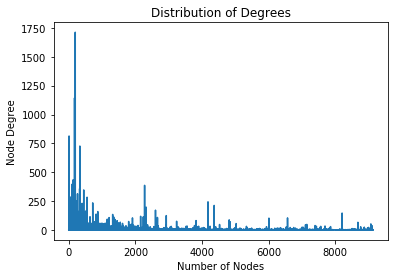

In [55]:
degrees = get_degree(N)
plt.xlabel("Number of Nodes")
plt.ylabel("Node Degree")
plt.title("Distribution of Degrees")
plt.plot(degrees)

In [56]:
max(degrees)

1712

### Reduce graph by all nodes with degree less than 3

In [57]:
nodes = mark_nodes(3)
len(nodes)

7015

In [58]:
N.remove_nodes_from(nodes)

In [59]:
len(N.nodes())

2121

In [60]:
len(N.edges())

19905

In [61]:
nodes = mark_nodes(3)
while len(nodes)!=0:
    N.remove_nodes_from(nodes)
    nodes = mark_nodes(3)

In [62]:
neg_source_i = len(N.nodes())
neg_source_i

1875

In [63]:
degrees = get_degree(N)
len(degrees)

1875

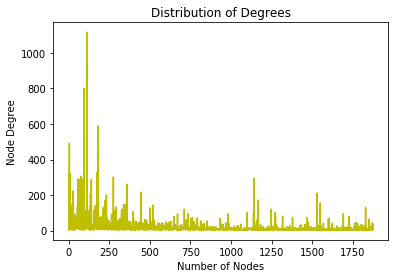

In [64]:
plt.xlabel("Number of Nodes")
plt.ylabel("Node Degree")
plt.title("Distribution of Degrees")
plt.plot(degrees, color='y')

In [65]:
dec = nx.degree_centrality(N)
len(dec)

1875

Text(0, 0.5, 'Degree of Centrality')

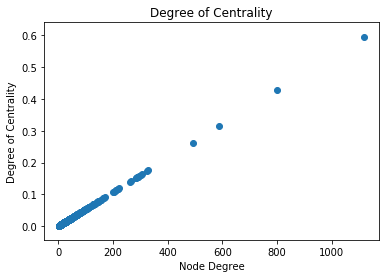

In [66]:
plt.scatter(degrees,dec.values())
plt.title("Degree of Centrality")
plt.xlabel("Node Degree")
plt.ylabel("Degree of Centrality")

### Compairing link sentiment of reduced graph to orignal

In [67]:
neg_sent = 0
for x,y,d in N.edges(data=True):
    neg_sent = neg_sent + d['LINK_SENTIMENT']
neg_sent

-47059

In [68]:
neg_sent/Total*100

76.96925089957475

### Reducing graph further by removing nodes with only a single negative sentiment sent or received

In [69]:
copy_sentiment_to_node(N)
nodes = mark_nodes_by_repetition(N,-1)
len(nodes)

1648

In [70]:
N.remove_nodes_from(nodes)

In [71]:
len(N.nodes())

227

In [72]:
len(N.edges())

1068

In [73]:
nodes = mark_nodes(0)
while len(nodes)!=0:
    N.remove_nodes_from(nodes)
    nodes = mark_nodes(0)

In [74]:
len(N.nodes())

215

In [75]:
len(N.edges())

1068

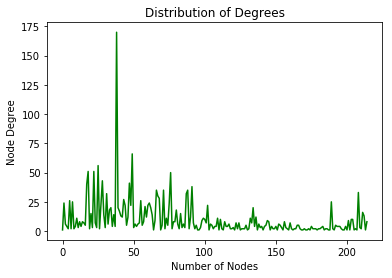

In [76]:
degrees = get_degree(N)
plt.xlabel("Number of Nodes")
plt.ylabel("Node Degree")
plt.title("Distribution of Degrees")
plt.plot(degrees, color='g')

Text(0, 0.5, 'Degree of Centrality')

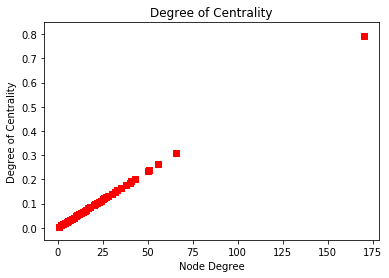

In [77]:
dec = nx.degree_centrality(N)
plt.scatter(degrees,dec.values(), color='red', marker='s')
plt.title("Degree of Centrality")
plt.xlabel("Node Degree")
plt.ylabel("Degree of Centrality")

In [78]:
for n in N.nodes():
    N.nodes[n]['degree'] = len(list(N.neighbors(n)))

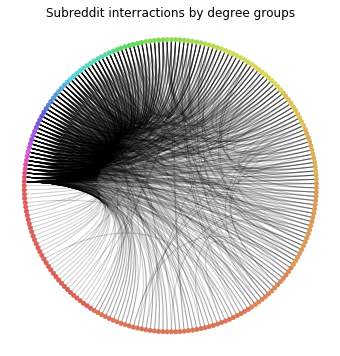

In [79]:
gf = nv.CircosPlot(N, node_grouping='degree',node_color='degree', node_order='degree')
gf.draw()
plt.title("Subreddit interractions by degree groups")
plt.show()

c:\users\mail2\desktop\projects\csc-501-assignments\venv\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


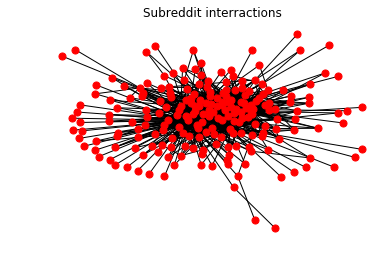

In [80]:
plt.title("Subreddit interractions")
nx.draw(N,node_size=50)
plt.show()

### Comparing Link Sentiment against number of words and characters

In [81]:
data_props = data_neg[['LINK_SENTIMENT','PROPERTIES']]
words = dict()
chars = dict()
for index, row in data_props.iterrows():
    word = int((row['PROPERTIES'].split(',')[7]).split('.')[0])
    ch =   int((row['PROPERTIES'].split(',')[0]).split('.')[0])
    if word in words:
        words[word]=words[word]+1
    else:
        words[word] = 1
    
    if ch in chars:
        chars[ch]=chars[ch]+1
    else:
        chars[ch] = 1  
words = dict(sorted (words.items()))
chars = dict(sorted (chars.items()))

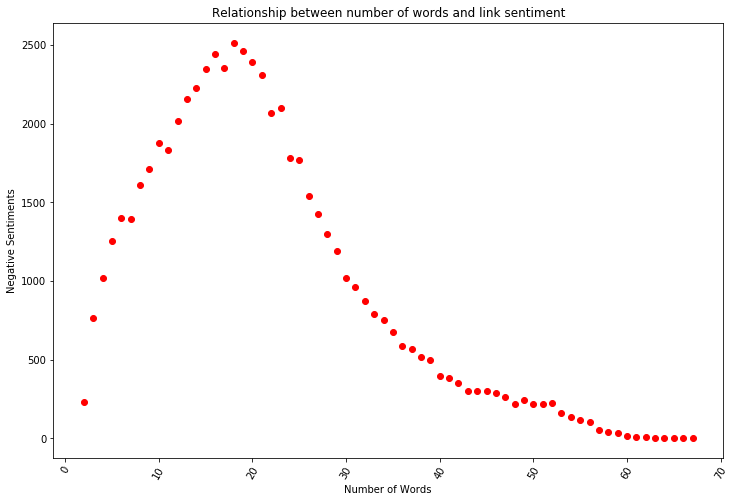

In [82]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=60)
plt.xlabel("Number of Words")
plt.ylabel("Negative Sentiments")
plt.title("Relationship between number of words and link sentiment")
plt.scatter(words.keys(),words.values(), color='r')

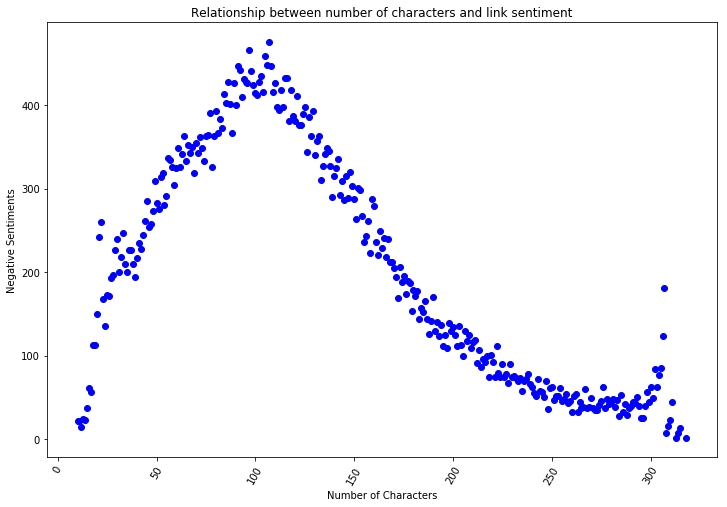

In [83]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=60)
plt.xlabel("Number of Characters")
plt.ylabel("Negative Sentiments")
plt.title("Relationship between number of characters and link sentiment")
plt.scatter(chars.keys(),chars.values(), color='b')

### Finding the largest community and interaction among them

In [84]:
def largest_closed_community(G,size):
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique)==size:
            mcs.append(clique)
    return mcs 

size_of_cliques = range(3,22)
num_of_cliques = []
for n in size_of_cliques:
    size = len(largest_closed_community(G,n))
    if (size!=0):
        num_of_cliques.append(size)

In [85]:
size_of_cliques = range(3,len(num_of_cliques)+3)
size_of_cliques = list(size_of_cliques)
large_c = largest_closed_community(G, max(size_of_cliques))
node_list = []
for _edge in large_c:
    for _node in _edge:
        if _node not in node_list:
            node_list.append(_node)
sub_G=G.subgraph(node_list) 
sub_G.nodes

NodeView(('subredditdrama', 'unexpectedhamilton', 'trollstationone', 'jimmiesclub', 'pokemonaxis', 'oxford', 'reading', 'avengersacademygame', 'pokemonbattles'))

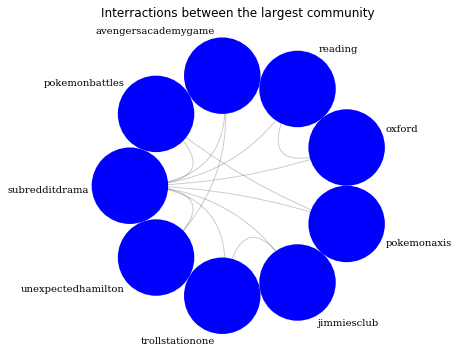

In [86]:
c = nv.CircosPlot(sub_G,node_labels=True)
# Draw the CircosPlot to the screen
c.draw()
plt.title("Interractions between the largest community")
plt.show()

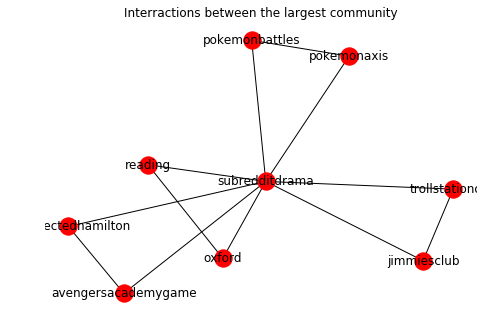

In [87]:
nx.draw(sub_G,with_labels = True)
plt.title("Interractions between the largest community")
plt.show()

In [88]:
print("It took %s seconds to process" % (time.time() - startTime))

It took 8.522409439086914 seconds to process
